# GEOG 288 CJ - Homework 3 
## Ian Baxter

In [2]:
import numpy as np
import matplotlib.pyplot as plt

1)	You have 30-minute averages of wind speed from cup anemometers at two levels above a uniform surface under nearly neutral conditions (potential temperature constant with height). You find that at 1.5 m the mean wind speed is 2.7 m s-1 and at 6.2 m the wind speed is 3.19 m s-1.

Calculate the friction velocity u*, the roughness length z0, the shear stress and the wind speed at a height of 10 m. Assume the air density is 1.15 kg m-3 and the Von Karman’s constant is 0.4.

Based on your calculation of z0, do some research in textbooks and internet to find out what type of underlying surface have been during the experiment with the data above.


\begin{align}
z = 1.5  m, 
U = 2.7  ms^{-1}, 
z_{1} = 6.2  m
\end{align}

\begin{align}
\frac{dU}{dz} = \frac{u^{*}}{z}
\end{align}

\begin{align}
\frac{dU}{dz} = \frac{u^{*}}{kz}, k = 0.4
\end{align}

\begin{align}
U = \frac{u^{*}}{k} \ln{z} + C
\end{align}

\begin{align}
U_{1} = \frac{u^{*}}{k} \ln{(\frac{z_1}{z_{o}})}
\end{align}

\begin{align}
-U_{2} = -\frac{u^{*}}{k} \ln{(\frac{z_2}{z_{o}})}
\end{align}

\begin{align}
U_{1} - U_{2} = \frac{u^{*}}{k} \ln{\frac{z_{1}}{z_{2}}}
\end{align}

\begin{align}
\frac{u^{*}}{k} = \frac{z_{2}}{z_{1}} \exp{(U_{1} - U_{2})}
\end{align}

In [3]:
U_1 = 2.7
z_1 = 1.5
U_2 = 3.19
z_2 = 6.2
rho = 1.15
k = 0.4
z_3 = 10

u_star_k = (U_1-U_2)/np.log(z_1/z_2)
print('u_star_k =',u_star_k)
u_star = u_star_k * 0.4
print('u_star =',u_star,'m/s')

u_star_k = 0.3452931161832485
u_star = 0.1381172464732994 m/s


\begin{align}
\ln{\frac{z_{1}}{z_{o}}} = U_{1}\frac{k}{u_{*}}
\end{align}

\begin{align}
\ln{z_{1}} - \ln{z_{o}} = U_{1} \frac{k}{u_{*}}
\end{align}

\begin{align}
\ln{z_{o}} = \ln_{z_{1}} - U_{1}\frac{k}{u_{*}}
\end{align}

\begin{align}
z_{o} = \exp{(\ln{z_{1}}-U_{1}\frac{k}{u^{*}})}
\end{align}

In [4]:
ln_z_0 = np.log(z_1)-U_1*(1/u_star_k)
print(ln_z_0)
z_0 = np.exp(ln_z_0)
print('z_o =',z_0, 'm')

-7.413978354434248
z_o = 0.0006027678937846366 m


\begin{align}
u^{*} = (\tau_{o}/\rho)^{1/2}
\end{align}

\begin{align}
\tau_o = \rho u_{*}^{2} 
\end{align}

In [5]:
# Tau
tau = rho * u_star ** 2
print('Tau =',tau,'N/m^2')

Tau = 0.021937829839371054 N/m^2


In [6]:
U_10 = (u_star_k)*np.log(10/z_0)
print('U at 10m =',U_10,'m/s')

U at 10m = 3.3550624713547634 m/s


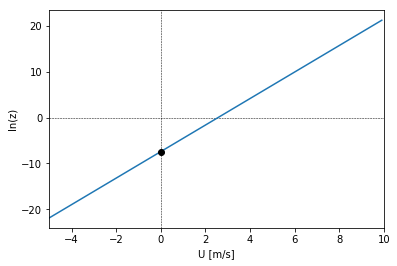

In [13]:
fig = plt.figure()

ax = plt.axes()
ax.set_xlim([-5,10])
#ax.set_ylim([0,3.5])
ax.set_xlabel('U [m/s]')
ax.set_ylabel('ln(z)')
ax.axhline(0,linestyle='--',linewidth=0.5,c='black')
ax.axvline(0,linestyle='--',linewidth=0.5,c='black')

U = np.arange(-5,10,step=0.1)
ln_z = U * (1/u_star_k) + ln_z_0
plt.plot(U,ln_z)
plt.plot(0,ln_z_0,marker='o',markerfacecolor='k',c='k');

## Surface Energy Balance

### 2)	Problem 1

(a) Over an ocean surface, the Bowen ratio is estimated to be about 0.2. Estimate the sensible and latent heat fluxes to the atmosphere, as well as the rate of evaporation, in millimeters per day, from the ocean surface, when the net radiation received just above the surface is 600 W m-2, the heat flux to the water below 50 m is negligible, the rate of warming of the 50 m deep oceanic mixed layer is 0.08C day-1, and the sea surface temperature is 25C.

(b) What will be the rate of warming or cooling of the 50 m deep oceanic mixed layer at the time of intense cold-air advection when the Bowen ratio is estimated to be 0.5, the net radiation loss from the surface is 50 W m-2, and the rate of evaporation is 20 mm day-1?


\begin{align}
\Delta{H_{S}} = \int{\frac{\partial{}}{\partial{t}} (\rho c T) dz}
\end{align}

\begin{align} 
H_{G} = R_{N} - H - H_{L} - \Delta{H_{S}}
\end{align}

\begin{align}
H = \frac{R_{N} - H_{G}}{1 + B^{-1}}
\end{align}

\begin{align}
H_{L} = \frac{R_{N} - H_{G}}{1 + B}
\end{align}

\begin{align}
H_{L} = L_{e}E,   L_{e} = 2.45*10^{6}  Jkg^{-1}
\end{align}

\begin{align}
E = \frac{H_{L}}{L_e{}}
\end{align}

In [75]:
B = 0.2
R_n = 600
dTdt = 0.08 / 86400
sst = 25 + 273.15
sigma = 5.65*10**-8
rho_w = 1029
cp_w = 3850
dz = 50
L_e = 2.45 * 10**6
H_g = 0

# Energy storage of ocean mixed layer
dHs = rho_w * cp_w * dTdt * dz
print('dHs =',dHs,'Wm^-2')

# Sensible Heat Flux
H = (R_n - H_g - dHs) / (1 + B**(-1))
print('H =', H, 'Wm^-2')

# Latent Heat Flux
H_L = (R_n - H_g - dHs) / (1 + B)

# Evaporation Rate
E = H_L /(L_e) * 86400
print('H_L =',H_L,'W/m^2')
print('E =',E, 'mm/day')

dHs = 183.40972222222223 Wm^-2
H = 69.43171296296296 Wm^-2
H_L = 347.15856481481484 W/m^2
E = 12.242653061224491 mm/day


\begin{align}
H_{L} = L_{e} E
\end{align}

\begin{align}
H_{G} = R_{N} - H_{L}(1 + B)
\end{align}

\begin{align}
H = \frac{R_{N} - H_{G}}{1 + B}
\end{align}

\begin{align} 
\Delta{H_{S}} = R_{N} - H - H_{L} - H_{G}
\end{align}

\begin{align}
\frac{\partial{T}}{\partial{t}} = \frac{\Delta{H_{S}}}{\rho c dz}
\end{align}

In [1]:
B = 0.5
R_n = -50
E = 20 / 86400 / 1000
sst = 25
rho_w = 1029
cp_w = 3850
L_e = 2.45 * 10**6
dz = 50
H_g = 0 

# H_L from E
H_L = L_e * E * 1000
print('H_L =',H_L,'W/m^2')

# Sensible Heat Flux
#H = (R_n - H_g) / (1 + B**(-1))
H = H_L * B
print('H =',H,'Wm^-2')

# Internal Heat Storage change
dHs = R_n - H - H_L - H_g
print('dHs =', dHs)

# Heating rate
dTdt = dHs / (rho_w * cp_w * dz) * 86400
print('dTdt =',dTdt, 'Kday^-1')

H_L = 567.1296296296297 W/m^2
H = 283.56481481481484 Wm^-2
dHs = -900.6944444444446
dTdt = -0.39286660861004885 Kday^-1


## Radiation Balance near the Surface

### 3)	Problem 2 - The following measurements were made over a short grass surface on a winter night when no evaporation or condensation occurred:

Outgoing longwave radiation from the surface = 365 W m-2
Incoming longwave radiation from the atmosphere = 295 W m-2
Ground heat flux from the soil = 45 W m-2

(a) Calculate the apparent (equivalent blackbody) temperature of the surface. 

(b) Calculate the actual surface temperature if surface emissivity is 0.92.

(c) Estimate the sensible heat flux to or from air.



\begin{align}
\sigma T ^{4}
\end{align}

\begin{align}
T = (\frac{E}{\sigma \epsilon})^{4}
\end{align}

\begin{align}
H = R_{N} - H_{G}
\end{align}

In [107]:
T = (365/5.67*10**8)**(1/4)
print('Apparent blackbody T =',T,'K')
T = (365/5.67*10**8/0.92)**(1/4)
print('Actual surface T =',T, 'K')
H = (365 - 295) - 45
print('Sensible heat flux to or from air =', H, 'W/m^2')

Apparent blackbody T = 283.25491302538177 K
Actual surface T = 289.22144697038755 K
Sensible heat flux to or from air = 25 W/m^2


### Problem 3

(a) Estimate the combined sensible and latent heat fluxes from the surface to the atmosphere, given the following observations:

Incoming shortwave radiation = 800 W m-2

Heat flux to the sub-medium = 150 W m-2

Albedo of the surface = 0.35


\begin{align}
H + H_{L} = (R_{n} * \alpha) - H_{G}
\end{align}

In [106]:
H = 800 * 0.35 - 150
print('a) Sensible + Latent Heat =',H,'W/m^2')
H = 800 * 0.07 - 150
print('b) Sensible + Latent Heat =',H,'W/m^2')

a) Sensible + Latent Heat = 130.0 W/m^2
b) Sensible + Latent Heat = -94.0 W/m^2


### Problem 4 - The following measurements were made at night from a meteorological tower:

Net radiation at the 2 m level =-125 W m-2

Net radiation at the 100 m level =-165 W m-2

Sensible heat flux at the surface =-75 W m-2

Planetary boundary layer height = 80 m

Calculate the average rate of cooling in the PBL due to the following: 


\begin{align}
(\frac{\partial{T}}{\partial{t}})_{R} = \frac{1}{\rho c_{p}} \frac{\partial{R_{N}}}{\partial{z}}
\end{align}

In [2]:
radiative_flux_divergence = (1/1200)*((-165+125)/(100-2)) * 86400
print('a) PBL cooling due to radiative flux divergence =',radiative_flux_divergence, 'K/hr')
sensible_heat_flux_divergence = (-1/1200)*((0+75)/80) * 86400
print('b) PBL cooling due to sensible heat flux divergence =',sensible_heat_flux_divergence, 'K/hr')

a) PBL cooling due to radiative flux divergence = -29.38775510204082 K/hr
b) PBL cooling due to sensible heat flux divergence = -67.5 K/hr
